# **Gradient Descent: Step by Step**
Gradient descent is an optimization algorithm commonly used in machine learning and deep learning for minimizing a cost function or loss function. Its primary goal is to find the optimal parameters or weights for a model that minimize the error between predicted and actual values. It is widely used in training machine learning models, particularly for tasks like linear regression and neural network training.

Here's a basic explanation of how gradient descent works:

1. **Initialization**: Gradient descent starts by initializing the model's parameters with some initial values. These parameters can be weights in a neural network, coefficients in a linear regression model, or any other adjustable values.

2. **Calculate the Gradient**: The gradient of the cost function with respect to the model parameters is computed. The gradient is a vector that points in the direction of the steepest increase in the cost function. It indicates how the cost function would change if the parameters were adjusted.

3. **Update the Parameters**: The parameters are updated by moving in the opposite direction of the gradient. This means subtracting a fraction of the gradient from the current parameter values. The fraction by which the gradient is scaled is called the learning rate and is a hyperparameter that needs to be set beforehand.

   **New Parameter Value = Current Parameter Value - (Learning Rate * Gradient)**

4. **Repeat**: Steps 2 and 3 are repeated iteratively until a stopping condition is met. Common stopping conditions include a maximum number of iterations or a minimum threshold for the change in the cost function.

<center><img src="https://miro.medium.com/v2/resize:fit:600/0*vDPzKbk0IRE7iydT.jpg"></center>

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Make a Data**

In [2]:
from sklearn.datasets import make_regression

In [3]:
# Make a data for regression
X, y = make_regression(n_samples=4, 
                       n_features=1, 
                       n_informative=1,
                       n_targets=1,
                       noise=80,
                       random_state=0)

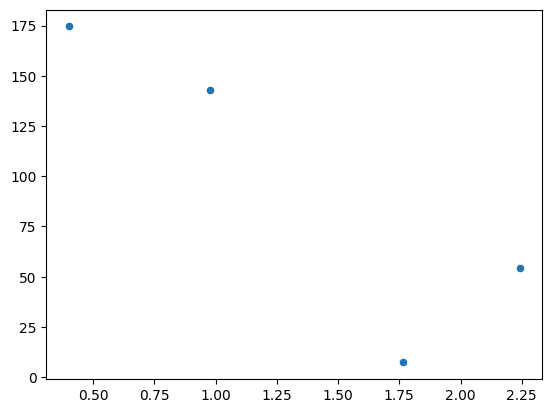

In [4]:
# Plot the data
sns.scatterplot(x=X.flatten(), y=y)
plt.show()

## **Apply Linear Regression with Ordinary Least Squares (OLS)**

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Instantiate an object of the LinearRegression class
lin_reg = LinearRegression()

# Fit the data
lin_reg.fit(X, y)

LinearRegression()

In [7]:
# Print the coefficent value
print("Coefficient (m):", lin_reg.coef_)

Coefficient (m): [-82.6424188]


In [8]:
# Print the intercept value
print("Intercept (b):", lin_reg.intercept_)

Intercept (b): 206.00450211809692


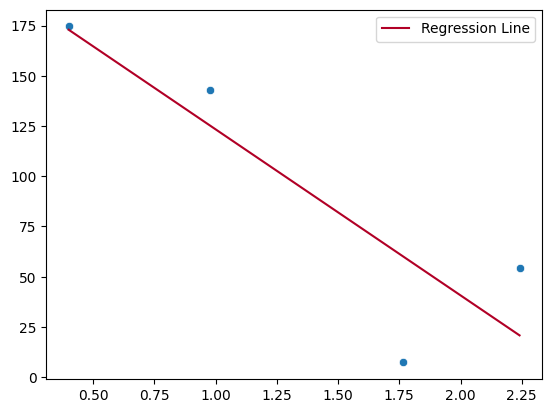

In [9]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y)
sns.lineplot(x=X.flatten(), y=lin_reg.predict(X), c="#b10026", label="Regression Line")
plt.legend()
plt.show()

## **Apply Linear Regression with Gradient Descent**

In [10]:
# Let's apply Gradient Descent assuming slope is constant m = -82.6424188
# And let's assume the starting value for intercept b = 0
m = -82.6424188
b = 0
y_pred = ((X * m) + b).reshape(4)
y_pred

array([ -33.0699596 , -145.78555276,  -80.88527438, -185.19283425])

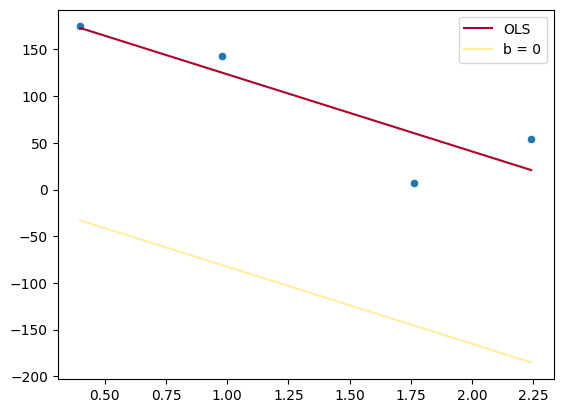

In [11]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y)
sns.lineplot(x=X.flatten(), y=lin_reg.predict(X), c="#b10026", label="OLS")
sns.lineplot(x=X.flatten(), y=y_pred, c="#ffeda0", label="b = 0")
plt.legend()
plt.show()

### **Iteration 1**

In [12]:
# Calculate Loss Slope (dL/dB)
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print("Loss Slope", loss_slope)

Loss Slope -1648.0360169231715


In [13]:
# Let's take a learning rate = 0.1
lr = 0.1

# Calculate Step Size
step_size = lr*loss_slope
print("Step Size:", step_size)

Step Size: -164.80360169231716


In [14]:
# Calculate the new intercept value
b = b - step_size
print("Intercept (b)", b)

Intercept (b) 164.80360169231716


In [15]:
# Predict the values
y_pred1 = ((X * m) + b).reshape(4)
y_pred1

array([131.73364209,  19.01804893,  83.91832731, -20.38923256])

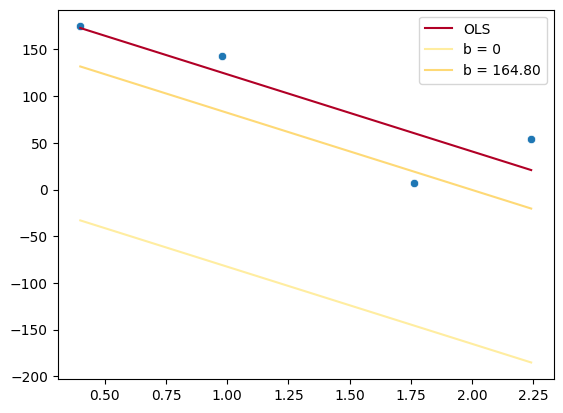

In [16]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y)
sns.lineplot(x=X.flatten(), y=lin_reg.predict(X), c="#b10026", label="OLS")
sns.lineplot(x=X.flatten(), y=y_pred, c="#ffeda0", label="b = 0")
sns.lineplot(x=X.flatten(), y=y_pred1, c="#fed976", label="b = 164.80")
plt.legend()
plt.show()

### **Iteration 2**

In [17]:
# Calculate Loss Slope (dL/dB)
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print("Loss Slope:", loss_slope)

step_size = lr * loss_slope
print("Step Size:", step_size)

# Calculate the new intercept value
b = b - step_size
print("Intercept (b):", b)

Loss Slope: -329.60720338463426
Step Size: -32.960720338463425
Intercept (b): 197.7643220307806


In [18]:
# Predict the values
y_pred2 = ((X * m) + b).ravel()
y_pred2

array([164.69436243,  51.97876927, 116.87904765,  12.57148778])

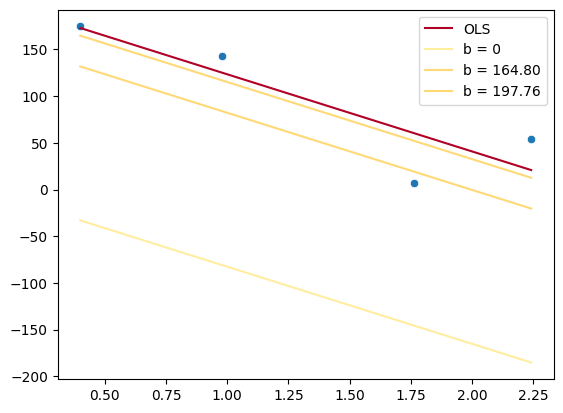

In [19]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y)
sns.lineplot(x=X.flatten(), y=lin_reg.predict(X), c="#b10026", label="OLS")
sns.lineplot(x=X.flatten(), y=y_pred, c="#ffeda0", label="b = 0")
sns.lineplot(x=X.flatten(), y=y_pred1, c="#fed976", label="b = 164.80")
sns.lineplot(x=X.flatten(), y=y_pred2, c="#fed976", label="b = 197.76")
plt.legend()
plt.show()

### **Iteration 3**

In [20]:
# Calculate Loss Slope (dL/dB)
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print("Loss Slope:", loss_slope)

step_size = lr * loss_slope
print("Step Size:", step_size)

# Calculate the new intercept value
b = b - step_size
print("Intercept (b):", b)

Loss Slope: -65.9214406769268
Step Size: -6.592144067692681
Intercept (b): 204.35646609847328


In [21]:
# Predict the values
y_pred3 = ((X * m) + b).ravel()
y_pred3

array([171.2865065 ,  58.57091334, 123.47119172,  19.16363184])

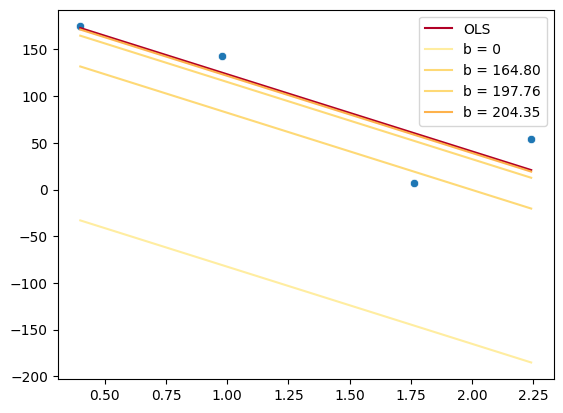

In [22]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y)
sns.lineplot(x=X.flatten(), y=lin_reg.predict(X), c="#b10026", label="OLS")
sns.lineplot(x=X.flatten(), y=y_pred, c="#ffeda0", label="b = 0")
sns.lineplot(x=X.flatten(), y=y_pred1, c="#fed976", label="b = 164.80")
sns.lineplot(x=X.flatten(), y=y_pred2, c="#fed976", label="b = 197.76")
sns.lineplot(x=X.flatten(), y=y_pred3, c="#feb24c", label="b = 204.35")
plt.legend()
plt.show()

## **Apply Gradient Descent using Loop**

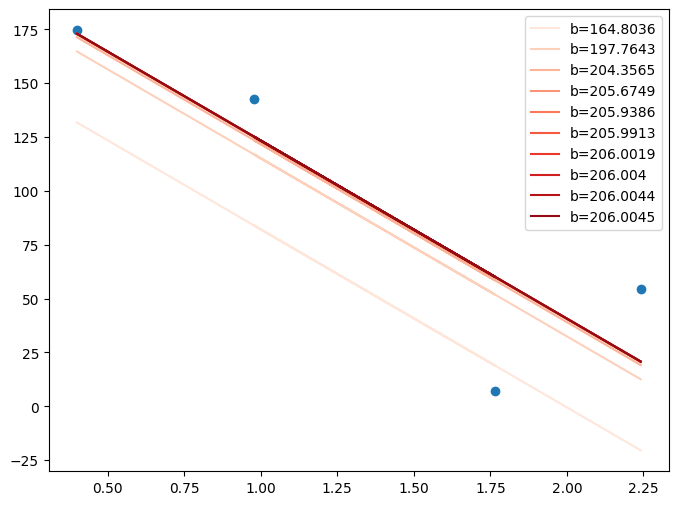

In [23]:
# Define the initial values
m = -82.6424188 # assume to be constant
b = 0
lr = 0.1

epochs = 10

plt.figure(figsize=(8, 6))
color_palette = sns.color_palette(palette="Reds", n_colors=epochs)

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    step_size = lr * loss_slope
    b = b - step_size
    
    y_pred = (X * m) + b

    plt.plot(X.ravel(), y_pred.ravel(), label=f"b={b.round(4)}", c=color_palette[i])
    plt.legend()
    
plt.scatter(X.ravel(), y)
plt.show()